In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Quadratic Regression Model
$$
f(x) = ax^2 + bx + c
$$

로 한정하지말고, Neural Network Model을 사용해 봅니다.

### 데이터 생성
데이터는 위의 함수를 이용해서 생성합니다. Train용과 Test용 2가지를 50개씩 생성합니다.

In [2]:
np.random.seed(410)
xxx = np.linspace(-1,1,500)# for drawing
xx = np.linspace(-1,1,50)
yy = xx**2 + 0.5 * xx + 1.0 + 0.5 * (2 * np.random.rand(len(xx)) - 1)
yy_test = xx**2 + 0.5 * xx + 1.0 + 0.5 * (2 * np.random.rand(len(xx)) - 1)

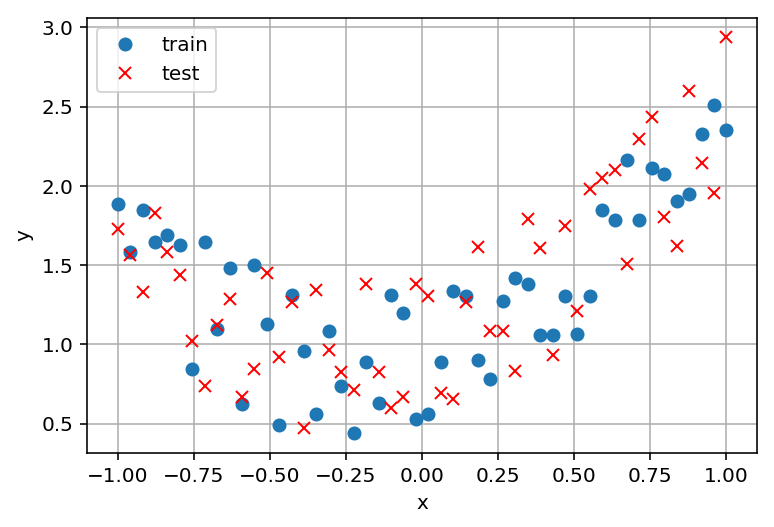

In [3]:
plt.plot(xx, yy, 'o', label='train')
plt.plot(xx, yy_test, 'xr', label='test')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [4]:
features = np.array([[xval] for xval in xx])
print(features.shape)
labels = yy

(50, 1)


### Neural Network Model

모델 구성은 다음과 같습니다.

1. Hidden Layer 1 : $h_1 = \sigma(xW_1 + b_1) $
1. Hidden Layer 2 : $h_2 = \sigma(h_1W_2 + b_2) $
1. Output Layer : $\hat{y} = h_2W_3 + b_3  $

In [5]:
import tensorflow as tf
num_hidden1 = 10
num_hidden2 = 4
x = tf.placeholder(tf.float32, shape=[None, 1])

tf.set_random_seed(180410)

# TODO 1 : Variable for hidden layer 1
W1 = tf.Variable(tf.random_normal([1, num_hidden1]))
b1 = tf.Variable(tf.random_normal([num_hidden1]))

# TODO 2 : Variable for hidden layer 2
W2 = tf.Variable(tf.random_normal([num_hidden1, num_hidden2]))
b2 = tf.Variable(tf.random_normal([num_hidden2]))

# TODO 3 : Variable for output layer
W3 = tf.Variable(tf.random_normal([num_hidden2, 1]))
b3 = tf.Variable(tf.random_normal([1]))

# TODO 4 : Hidden layer 1 model
hidden1 = tf.nn.sigmoid(tf.matmul(x, W1) + b1)

# TODO 5 : Hidden layer 2 model
hidden2 = tf.nn.sigmoid(tf.matmul(hidden1, W2) + b2)

# Final model
model = tf.matmul(hidden2, W3) + b3

## Loss function
$$
loss = \frac{1}{m}\sum_{i=1}^m |y_i-\hat{y_i}|^2
$$

In [6]:
y = tf.placeholder(tf.float32, shape=[None, 1])

loss = tf.reduce_mean(tf.square(y - model))

optimizer = tf.train.AdamOptimizer()
train = optimizer.minimize(loss)

## Gradient Method

In [7]:
def plot_model(curr_loss, curr_test_loss, prediction, i):
    plt.plot(xx, yy, 'o')
    plt.plot(xx, yy_test, 'o')
    plt.plot(xxx, prediction, '-r')
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('{0}'.format(i))
    plt.show()

0 6.0750403 6.297629


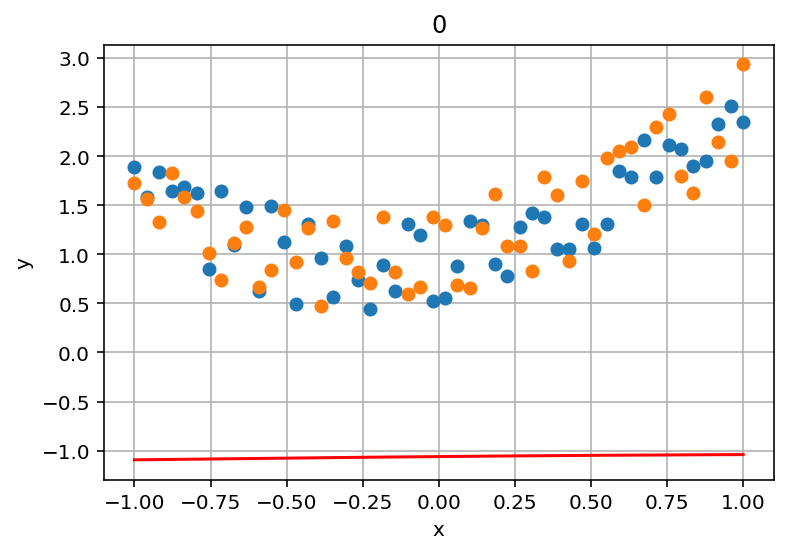

1000 0.24560314 0.25825414
2000 0.21367855 0.21956913
3000 0.1484367 0.16016257
4000 0.07938856 0.11977356
5000 0.073939584 0.121503495
6000 0.07220379 0.12081872
7000 0.071449034 0.1206761
8000 0.07115108 0.12088466
9000 0.07090226 0.12127319
10000 0.07055253 0.12202471


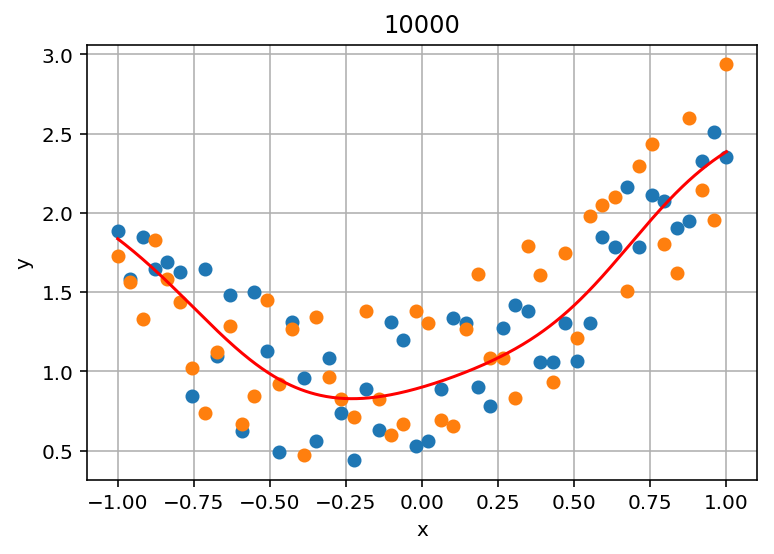

11000 0.07012154 0.12313461
12000 0.06927808 0.124391526
13000 0.06739678 0.12529927
14000 0.06587741 0.12505607
15000 0.06495944 0.12363103
16000 0.063523844 0.12054146
17000 0.06296959 0.12006135
18000 0.06258804 0.12075303
19000 0.062269125 0.12157992
20000 0.06190601 0.12193691


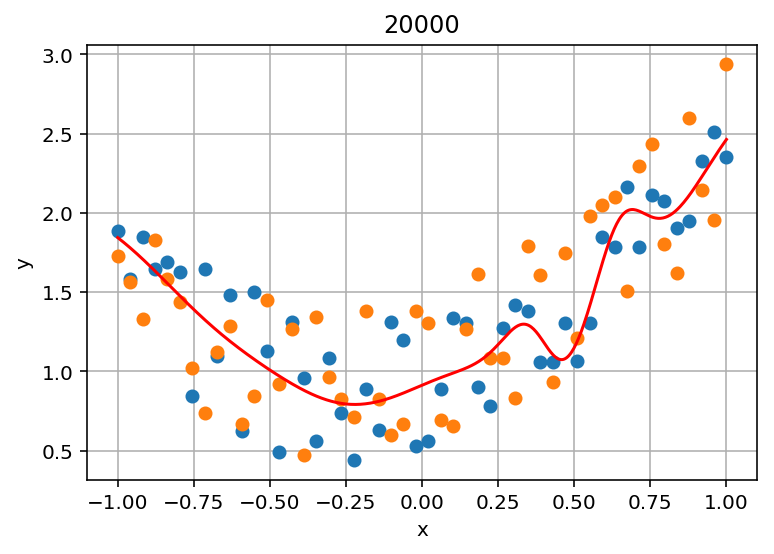

21000 0.06127104 0.12244607
22000 0.06036213 0.12431819
23000 0.0595211 0.12673156
24000 0.058985867 0.12831597
25000 0.05865179 0.12916778
26000 0.0583562 0.12988554
27000 0.057989698 0.13070653
28000 0.057541773 0.13147876
29000 0.056915954 0.13135017
30000 0.05615407 0.13100791


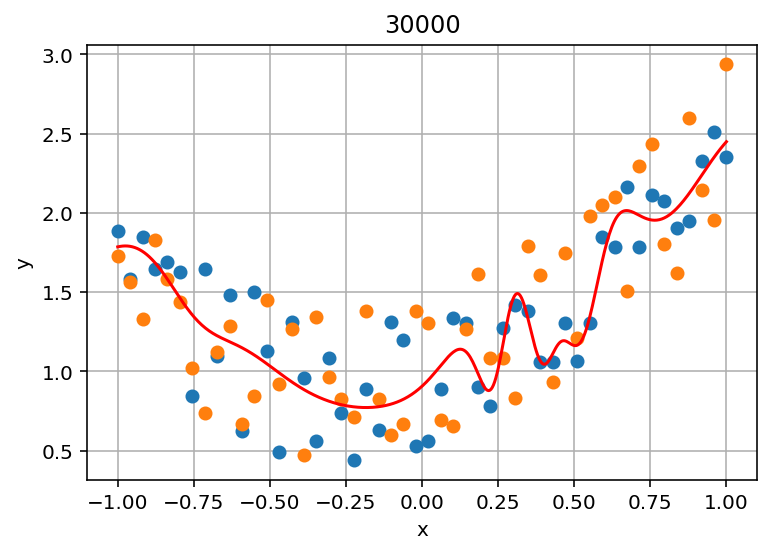

31000 0.05544833 0.13093628
32000 0.05478125 0.13100734
33000 0.05390991 0.1308544
34000 0.046988126 0.14719535
35000 0.04465203 0.15388103
36000 0.043003667 0.15764943
37000 0.04158792 0.16022804
38000 0.040178247 0.16206263
39000 0.03889377 0.16408683
40000 0.03759948 0.16611044


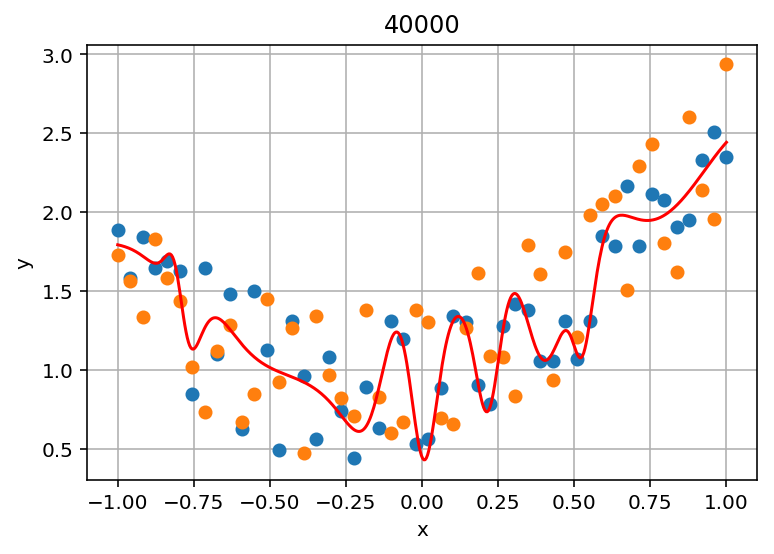

41000 0.03627859 0.16786444
42000 0.035114814 0.1695587
43000 0.03424073 0.17081882
44000 0.033588316 0.17179298
45000 0.03302326 0.17266384
46000 0.032457575 0.17364666
47000 0.031938314 0.17488985
48000 0.03153667 0.17606646
49000 0.031238206 0.17701285
50000 0.031004064 0.17764753


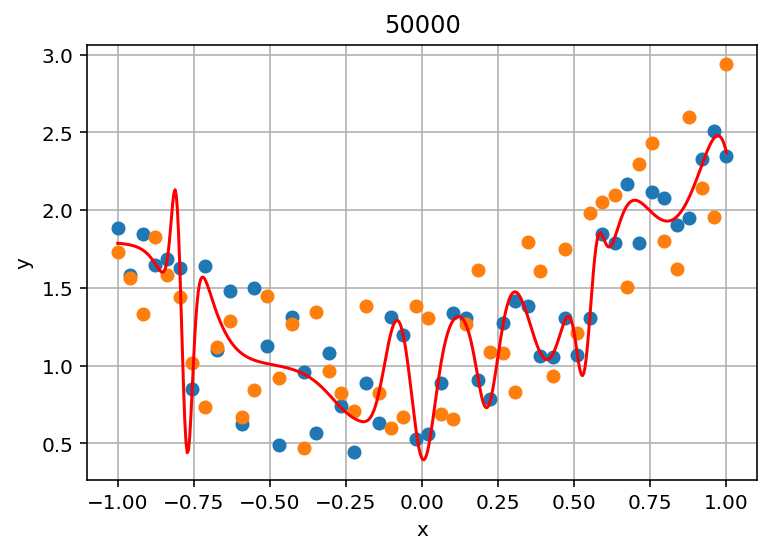

51000 0.030808073 0.17850113
52000 0.030620284 0.17848729
53000 0.030442266 0.17866069
54000 0.030265316 0.17898521
55000 0.030084396 0.17900866
56000 0.029899992 0.17900935
57000 0.029710975 0.17902686
58000 0.029518371 0.17901456
59000 0.029322378 0.17914404
60000 0.029128328 0.17879471


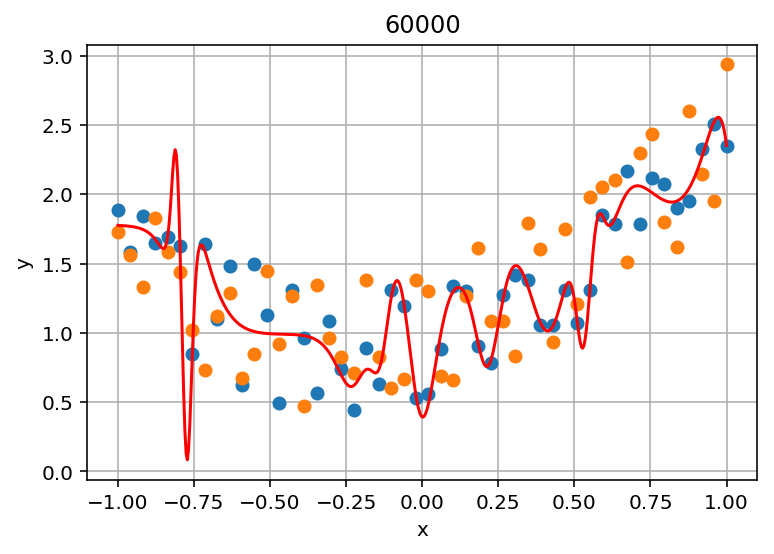

In [8]:
losses = []
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
for i in range(60001):
    sess.run(train, feed_dict={x:features, y:labels.reshape(-1,1)})
    curr_loss = sess.run(loss, feed_dict={x:features, y:labels.reshape(-1,1)})
    curr_test_loss = sess.run(loss, feed_dict={x:features, y:yy_test.reshape(-1,1)})
    losses.append([curr_loss, curr_test_loss])
    if i % 1000 == 0:
        print(i, curr_loss, curr_test_loss)
    if i % 10000 == 0:
        prediction = sess.run(model, feed_dict={x:xxx.reshape(-1,1), y:labels.reshape(-1,1)})
        plot_model(curr_loss, curr_test_loss, prediction, i)

losses = np.array(losses)

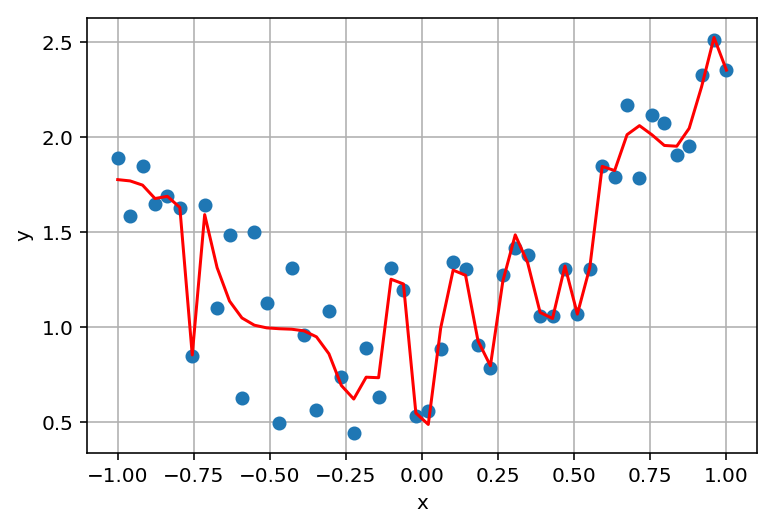

In [9]:
prediction = sess.run(model, feed_dict={x:features, y:labels.reshape(-1,1)})
plt.plot(xx, yy, 'o')
plt.plot(xx, prediction, '-r')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Train/Test loss

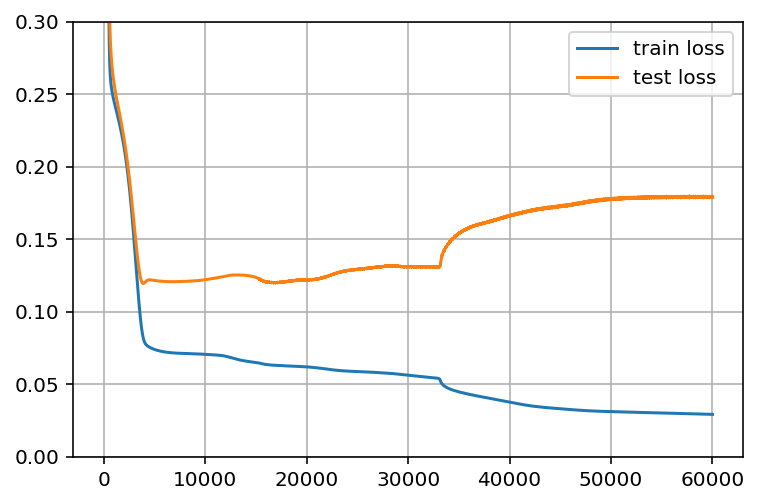

In [10]:
plt.plot(losses[:,0], label='train loss')
plt.plot(losses[:,1], label='test loss')
plt.grid()
plt.ylim([0, 0.3])
plt.legend()
plt.show()